In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib
import matplotlib.pyplot as plt

In [5]:
aircraftdf = pd.read_csv("/home/dsc/Data/opentraveldata/optd_aircraft.csv",sep="^")
aircraftdf.head()

,iata_code,manufacturer,model,iata_group,iata_category,icao_code,nb_engines,aircraft_type
0,100,Fokker,100,100,2J,F100,2,J
1,141,BAe,146-100,146,4J,B461,4,J
2,142,BAe,BAE Systems 146-200 Passenger,146,4J,B462,4,J
3,143,BAe,146-300,146,4J,B463,4,J
4,146,BAe,146,NaN,NaN,NaN,NaN,NaN


In [6]:
len(aircraftdf)

457

In [14]:
# Aircrafts with 4 engines
fourenginedf=aircraftdf[aircraftdf["nb_engines"]==4]
len(fourenginedf)

61

In [16]:
# To count no null
aircraftdf.count()

iata_code        457
manufacturer     453
model            457
iata_group       363
iata_category    363
icao_code        363
nb_engines       343
aircraft_type    362
dtype: int64

In [17]:
jtypedf=aircraftdf[aircraftdf["aircraft_type"]=="J"]
len(jtypedf)

231

In [20]:
len(aircraftdf[aircraftdf["aircraft_type"]=="J"])

231

In [32]:
sum(aircraftdf["aircraft_type"]=="J")

231

In [35]:
aircraftdf.groupby("aircraft_type").count()

,iata_code,manufacturer,model,iata_group,iata_category,icao_code,nb_engines
aircraft_type,,,,,,,
H,12,12,12,12,12,12,0
J,231,230,231,231,231,231,231
P,30,30,30,30,30,30,30
S,6,4,6,6,6,6,0
T,83,82,83,83,83,83,82


In [40]:
len(aircraftdf[(aircraftdf["nb_engines"]==4) & (aircraftdf["aircraft_type"]=='J')])


49

In [41]:
aircraftdf[(aircraftdf["nb_engines"]==4) & (aircraftdf["aircraft_type"]=='J')].count()

iata_code        49
manufacturer     49
model            49
iata_group       49
iata_category    49
icao_code        49
nb_engines       49
aircraft_type    49
dtype: int64

In [43]:
# Creating list of countries - google "country list text"
cadena = """Abkhazia
Afghanistan
Akrotiri and Dhekelia
Aland
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Ascension Island
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central Africa Republic
Chad
Chile
China
Christmas Island
Cocos (Keeling) Islands
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'lvoire
Croatia
Cuba
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
East Timor Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Falkland Islands
Faroe Islands
Fiji
Finland
France
French Polynesia
Gabon
Cambia, The
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guemsey
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Isle of Man
Israel
Italy
Jamaica
Japan
Jersey
Jordan
Kazakhstan
Kenya
Kiribati
Korea, N
Korea, S
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Macao
Macedonia
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Mauritania
Mauritius
Mayotte
Mexico
Micronesia
Moldova
Monaco
Mongolia
Montenegro
Montserrat
Morocco
Mozambique
Myanmar
Nagorno-Karabakh
Namibia
Nauru
Nepal
Netherlands
Netherlands Antilles
New Caledonia
New Zealand
Nicaragua
Niger
Nigeria
Niue
Norfolk Island
Northern Cyprus
Northern Mariana Islands
Norway
Oman
Pakistan
Palau
Palestine
Panama
Papua New Guinea
Paraguay
Peru
Philippines
Pitcaim Islands
Poland
Portugal
Puerto Rico
Qatar
Romania
Russia
Rwanda
Sahrawi Arab Democratic Republic
Saint-Barthelemy
Saint Helena
Saint Kitts and Nevis
Saint Lucia
Saint Martin
Saint Pierre and Miquelon
Saint Vincent and Grenadines
Samos
San Marino
Sao Tome and Principe
Saudi Arabia
Senegal
Serbia
Seychelles
Sierra Leone
Singapore
Slovakia
Slovenia
Solomon Islands
Somalia
Somaliland
South Africa
South Ossetia
Spain
Sri Lanka
Sudan
Suriname
Svalbard
Swaziland
Sweden
Switzerland
Syria
Tajikistan
Tanzania
Thailand
Togo
Tokelau
Tonga
Transnistria
Trinidad and Tobago
Tristan da Cunha
Tunisia
Turkey
Turkmenistan
Turks and Caicos Islands
Tuvalu
Uganda
Ukraine
United Arab Emirates
United Kingdom
United States
Uruguay
Uzbekistan
Vanuatu
Vatican City
Venezuela
Vietnam
Virgin Islands, British
Virgin Islands, U.S.
Wallis and Futuna
Yemen
Zambia
Zimbabwe"""

In [44]:
cadena

"Abkhazia\nAfghanistan\nAkrotiri and Dhekelia\nAland\nAlbania\nAlgeria\nAmerican Samoa\nAndorra\nAngola\nAnguilla\nAntigua and Barbuda\nArgentina\nArmenia\nAruba\nAscension Island\nAustralia\nAustria\nAzerbaijan\nBahamas, The\nBahrain\nBangladesh\nBarbados\nBelarus\nBelgium\nBelize\nBenin\nBermuda\nBhutan\nBolivia\nBosnia and Herzegovina\nBotswana\nBrazil\nBrunei\nBulgaria\nBurkina Faso\nBurundi\nCambodia\nCameroon\nCanada\nCape Verde\nCayman Islands\nCentral Africa Republic\nChad\nChile\nChina\nChristmas Island\nCocos (Keeling) Islands\nColombia\nComoros\nCongo\nCook Islands\nCosta Rica\nCote d'lvoire\nCroatia\nCuba\nCyprus\nCzech Republic\nDenmark\nDjibouti\nDominica\nDominican Republic\nEast Timor Ecuador\nEgypt\nEl Salvador\nEquatorial Guinea\nEritrea\nEstonia\nEthiopia\nFalkland Islands\nFaroe Islands\nFiji\nFinland\nFrance\nFrench Polynesia\nGabon\nCambia, The\nGeorgia\nGermany\nGhana\nGibraltar\nGreece\nGreenland\nGrenada\nGuam\nGuatemala\nGuemsey\nGuinea\nGuinea-Bissau\nGuyana\

In [48]:
paises = cadena.split("\n")
paises

['Abkhazia',
 'Afghanistan',
 'Akrotiri and Dhekelia',
 'Aland',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Ascension Island',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central Africa Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'lvoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland 

In [47]:
paises[0]

'Abkhazia'

In [49]:
paises[:5]

['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Aland', 'Albania']

In [50]:
# converting strings into lists
cadena2='1,2,3,4,5,6'
cadena2.split(',')

['1', '2', '3', '4', '5', '6']

In [75]:
random=np.random.randint(0,100,10)
random

array([43, 39, 17, 20, 63, 43, 15, 78, 26, 78])

In [76]:
len(paises)

242

In [77]:
random=np.random.randint(0,242,10)
random

array([ 67, 215, 116, 166, 129, 230, 193, 141, 164,  29])

In [78]:
data = DataFrame({"position":random})
data

,position
0,67
1,215
2,116
3,166
4,129
5,230
6,193
7,141
8,164
9,29


In [79]:
def quepais(pos):
    return paises[pos]
quepais(5)

'Algeria'

In [80]:
data.applymap(quepais)

,position
0,Ethiopia
1,Tokelau
2,Lebanon
3,Papua New Guinea
4,Mali
5,Uruguay
6,Sierra Leone
7,Montserrat
8,Palestine
9,Bosnia and Herzegovina


In [81]:
newdata = data.applymap(quepais)
newdata['position']

0                  Ethiopia
1                   Tokelau
2                   Lebanon
3          Papua New Guinea
4                      Mali
5                   Uruguay
6              Sierra Leone
7                Montserrat
8                 Palestine
9    Bosnia and Herzegovina
Name: position, dtype: object

In [82]:
data["pais"]=newdata
# or data["pais"] = newdata["position"]
data

,position,pais
0,67,Ethiopia
1,215,Tokelau
2,116,Lebanon
3,166,Papua New Guinea
4,129,Mali
5,230,Uruguay
6,193,Sierra Leone
7,141,Montserrat
8,164,Palestine
9,29,Bosnia and Herzegovina


### graphs

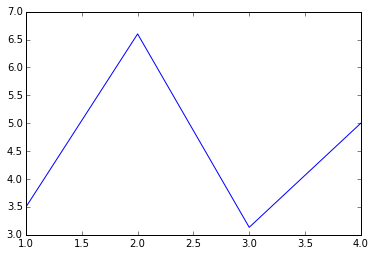

In [6]:
x=[1,2,3,4]
y=[3.5,6.6,3.13415926,5]
plt.plot(x,y,label="Lineal")

In [5]:
# I want graphs inside notebook
%matplotlib inline

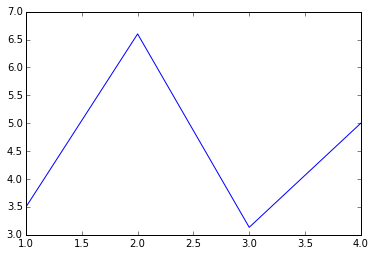

In [87]:
plt.plot(x,y,label="Lineal")

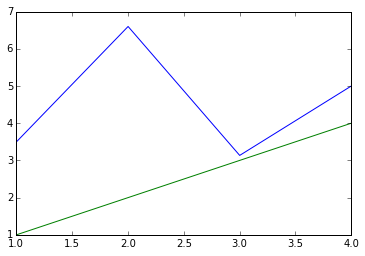

In [7]:
x2=[1,2,3,4]
y2=[1,2,3,4]
plt.plot(x ,y, label="Lineal")
plt.plot(x2,y2,label="Lineal")

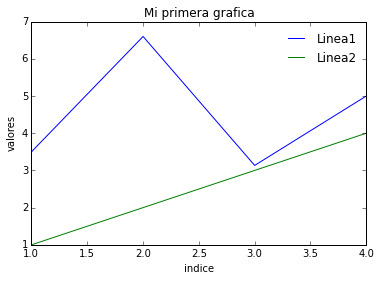

In [8]:
plt.title('Mi primera grafica')
plt.xlabel('indice')
plt.ylabel('valores')
plt.plot(x ,y, label="Linea1")
plt.plot(x2,y2,label="Linea2")
plt.legend(loc='best',frameon=False)

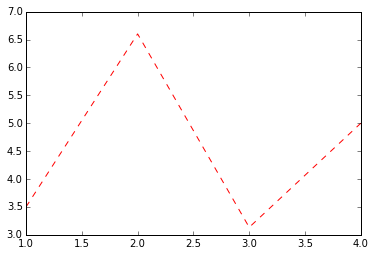

In [103]:
plt.plot(x,y,"r--",label="Linea1")

([<matplotlib.patches.Wedge at 0x7fe9b76f0150>,
  <matplotlib.text.Text at 0x7fe9b70f0cd0>])

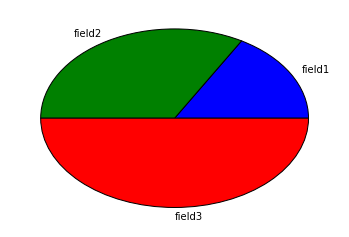

In [104]:
labels = ["field1", "field2","field3"]
valores = [1,2,3]
plt.pie(valores,labels=labels)

<Container object of 3 artists>

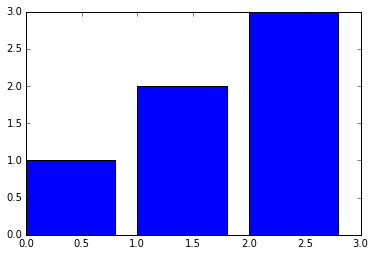

In [108]:
plt.bar([0,1,2],valores)

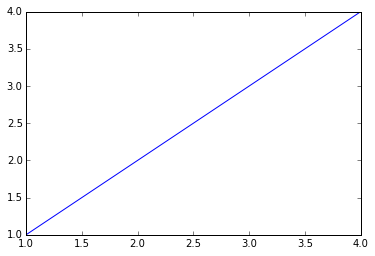

In [110]:
seriex=Series(x)
seriey=Series(y)
plt.plot(seriex,seriex)

In [112]:
data=DataFrame({"posicion":seriex,"valor":seriey})
data

,posicion,valor
0,1,3.500000
1,2,6.600000
2,3,3.134159
3,4,5.000000


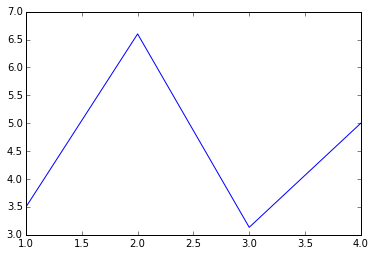

In [114]:
plt.plot(data["posicion"],data["valor"])